# 潜在データ (latent data) の可視化

`Section 06: Latent Diffusion and Stable Diffusion` の `Lecture 18: Components of Stable Diffusion` にて紹介した潜在データ (latent data) の可視化方法について紹介します。


## セットアップ

diffusers ライブラリをインストールすることで拡散モデルを簡単に使用できるようにします。

In [ ]:
pip install diffusers==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.0 MB/s eta 0:00:00


## VAE の読み込み

入力画像を潜在データへ変換する VAE を読み込みます。ここではこれまで Stable Diffusion として読み込んできた `runwayml/stable-diffusion-v1-5` を使用します。

In [ ]:
import torch
from diffusers import AutoencoderKL

model_id = "runwayml/stable-diffusion-v1-5"
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


## 入力画像を潜在データへ変換

読み込んだ VAE を元に、以下のようにして入力画像から潜在データへ変換する `pil_to_latents` 関数を定義します。

In [ ]:
import torchvision.transforms as transforms
from PIL.Image import Image as PilImage

def pil_to_latents(image: PilImage, scale_factor: float = 0.18215) -> torch.Tensor:
    init_image = transforms.ToTensor()(image)
    init_image = init_image.unsqueeze(dim=0)
    init_image = init_image * 2.0 - 1.0
    init_latent_dist = vae.encode(init_image).latent_dist.sample() * scale_factor
    return init_latent_dist

可視化で使用する画像をダウンロードしてきます。今回は講座内でも度々登場している画像生成 AI くんの画像を使用してみます。

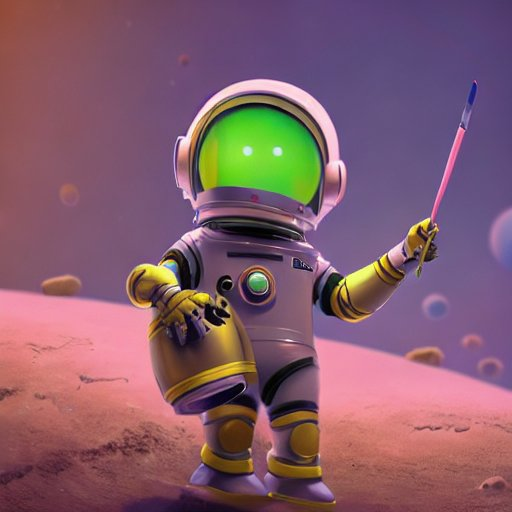

In [ ]:
from diffusers.utils import load_image

url = "https://github.com/shunk031/coloso-python-diffusion-models/blob/main/assets/image_generation_ai_kun.png?raw=true"

image = load_image(url)
image

上記で定義した `pil_to_latents` 関数を使用して、読み込んだ画像を潜在データに変換します。

In [ ]:
latent_img = pil_to_latents(image)
print(f"Dimension of this latent representation: {latent_img.shape}")

Dimension of this latent representation: torch.Size([1, 4, 64, 64])


変換した潜在データを以下のようにして可視化します。

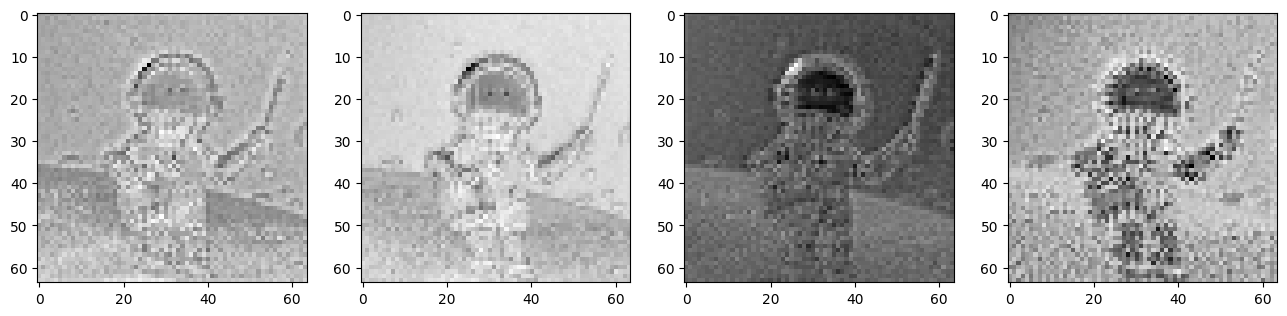

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for c in range(4):
    axes[c].imshow(latent_img[0][c].detach().cpu(), cmap='Greys')